**Table of contents**<a id='toc0_'></a>    
- [Business Objective](#toc1_1_)    

- [**Handling Data Types**](#toc3_)    
  - [Handling missing values](#toc3_1_)    
  - [Handle Features Type](#toc3_2_)    
  ____
- [Feature Engineering](#toc4_)    
    - [Handle Age Features](#toc4_1_1_)    
    - [Get Tenure (days) Features](#toc4_1_2_)    
    - [Get Marital Status](#toc4_1_3_) 
  ______
- [Analyzing RFM](#toc5_)    
  - [Get Monetary and Frequency Values](#toc5_1_)
  ____   
- [Clustering RFM](#toc6_)    
  - [Scaling Data](#toc6_1_)    
  - [PCA](#toc6_2_)    
  - [Clustering K-Means](#toc6_3_)    
    - [Distortion and Calinski-Harabaz Score](#toc6_3_1_)    
    - [Visualize K-Means](#toc6_3_2_)    
    - [Scoring Kmeans](#toc6_3_3_)    
  - [Clustering Gaussian Mixture](#toc6_4_)    
    - [AIC and BIC Score](#toc6_4_1_)    
    - [Visualize GMM](#toc6_4_2_)    
    - [Scoring Gaussian Mixture](#toc6_4_3_)    
  - [Hierarchical Clustering](#toc6_5_)    
    - [Calinski-Harabaz Score](#toc6_5_1_)    
    - [Visualize Hierarchical](#toc6_5_2_)    
    - [Scoring Hierarchical Clustering](#toc6_5_3_)    
  - [Model Evaluation](#toc6_6_)  
  ____  
- [RFM Segmentation](#toc7_)    
    - [RFM By K-Means Clustering](#toc7_1_1_)    
  - [RFM on Quantiles](#toc7_2_)    
    - [**RFM Segment**](#toc7_2_1_)    
    - [**Segmentation Customer**](#toc7_2_2_)    
    - [RFM Segment Percentation](#toc7_2_3_)    
    - [RFM Segment Map](#toc7_2_4_)    
    ____
- [Customer Lifetime Value (CLV) Modelling](#toc8_)    
  - [**BG/NBD Model**](#toc8_1_)    
    - [BG/NBD Assumptions](#toc8_1_1_)    
    - [Retention Model (Beta Geofitter)](#toc8_1_2_)    
    - [Visualizing Frequency/Recency matrix](#toc8_1_3_)    
    - [Estimate Number of Repeat Purchase](#toc8_1_4_)    
    - [Estimates the Probability of Customer Alive](#toc8_1_5_)    
  - [**LTV Modelling**](#toc8_2_)    
    - [Estimate the average transaction value](#toc8_2_1_)    
  - [Estimating customer lifetime value](#toc8_3_)  
  ____  
- [Conclusion](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

- [Feature Engineering](#toc4_)    
    - [Handle Age Features](#toc4_1_1_)    
    - [Get Tenure (days) Features](#toc4_1_2_)    
    - [Get Marital Status](#toc4_1_3_)    
    - [Get Object Value Unique Values](#toc4_1_4_)    
- [Analyzing RFM](#toc5_)    
  - [Get Monetary and Frequency Values](#toc5_1_)    
- [Clustering RFM](#toc6_)    
  - [Scaling Data](#toc6_1_)    
  - [PCA to Visualize Cluster](#toc6_2_)    
  - [Clustering K-Means](#toc6_3_)    
    - [Distortion and Calinski-Harabaz Score](#toc6_3_1_)    
    - [Visualize K-Means](#toc6_3_2_)    
    - [Scoring Kmeans](#toc6_3_3_)    
  - [Clustering Gaussian Mixture](#toc6_4_)    
    - [AIC and BIC Score](#toc6_4_1_)    
    - [**Visualize GMM**](#toc6_4_2_)    
    - [Scoring Gaussian Mixture](#toc6_4_3_)    
  - [Hierarchical Clustering](#toc6_5_)    
    - [Calinski-Harabaz Score](#toc6_5_1_)    
    - [Visualize Hierarchical](#toc6_5_2_)    
    - [Scoring Hierarchical Clustering](#toc6_5_3_)    
  - [Model Evaluation](#toc6_6_)    
- [RFM Segmentation](#toc7_)    
    - [RFM By K-Means Clustering](#toc7_1_1_)    
  - [**RFM on Quantiles**](#toc7_2_)    
    - [RFM Segment](#toc7_2_1_)    
    - [Segmentation Customer](#toc7_2_2_)    
    - [RFM Segment Percentation](#toc7_2_3_)    
    - [RFM Segment Map](#toc7_2_4_)    
- [Customer Lifetime Value (CLV) Modelling](#toc8_)    
  - [BG/NBD Model](#toc8_1_)    
    - [**BG/NBD Assumptions**](#toc8_1_1_)    
    - [Retention Model (Beta Geofitter)](#toc8_1_2_)    
    - [Visualizing Frequency/Recency matrix](#toc8_1_3_)    
    - [Estimate Number of Repeat Purchase](#toc8_1_4_)    
    - [Estimates the Probability of Customer Alive](#toc8_1_5_)    
  - [LTV Modelling](#toc8_2_)    
    - [Estimate the average transaction value](#toc8_2_1_)    
  - [Estimating customer lifetime value](#toc8_3_)    
- [Conclusion](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import ydata_profiling
import klib
import scipy
import joblib
import squarify
import datetime as dt
from d3blocks import D3Blocks

# import plotly.express as px

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from pywaffle import Waffle

from lifetimes import BetaGeoFitter, GammaGammaFitter
from scipy.stats import gamma, beta

from lifetimes.plotting import plot_frequency_recency_matrix, plot_probability_alive_matrix, plot_period_transactions, plot_transaction_rate_heterogeneity


warnings.filterwarnings('ignore')

In [2]:
plt.rcParams.update({'font.family':'sans-serif'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    bold = '\033[1m'
    underline = '\033[4m' 
    end = '\033[0m'

## <a id='toc1_1_'></a>[Business Objective](#toc0_)

    The main objective is to allows the company to maximize the profit of the next targeted marketing campaign 

# <a id='toc2_'></a>[](#toc0_)

In [3]:
raw_dataset = pd.read_excel('dataset/marketing_campaign.xlsx')

In [4]:
pd.set_option('display.max_columns', None)

raw_dataset.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

## <a id='toc2_1_'></a>[](#toc0_)
_____

| Content             | Description                                                        |          |
| :------------------ | :----------------------------------------------------------------- | :------- |
| **AcceptedCmp1**        | 1 if customer accepted the offer in the 1st campaign, 0 otherwise  | object   |
| **AcceptedCmp2**        | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  | object   |
| **AcceptedCmp3**        | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  | object   |
| **AcceptedCmp4**        | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  | object   |
| **AcceptedCmp5**        | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  | object   |
| **Response (target)**   | 1 if customer accepted the offer in the last campaign, 0 otherwise | object   |
| **Complain**            | 1 if customer complained in the last 2 years                       | object   |
| **DtCustomer**          | date of customer’s enrolment with the company                      | datetime |
| **Education**           | customer’s level of education                                      | object   |
| **Marital**             | customer’s marital status                                          | object   |
| **Kidhome**             | number of small children in customer’s household                   | object   |
| **Teenhome**            | number of teenagers in customer’s household                        | object   |
| **Income**              | customer’s yearly household income                                 | object   |
| **MntFishProducts**     | amount spent on fish products in the last 2 years                  | int64    |
| **MntMeatProducts**     | amount spent on meat products in the last 2 years                  | int64    |
| **MntFruits**           | amount spent on fruits products in the last 2 years                | int64    |
| **MntSweetProducts**    | amount spent on sweet products in the last 2 years                 | int64    |
| **MntWines**            | amount spent on wine products in the last 2 years                  | int64    |
| **MntGoldProds**        | amount spent on gold products in the last 2 years                  | int64    |
| **NumDealsPurchases**   | number of purchases made with discount                             | int64    |
| **NumCatalogPurchases** | number of purchases made using catalogue                           | int64    |
| **NumStorePurchases**   | number of purchases made directly in stores                        | int64    |
| **NumWebPurchases**     | number of purchases made through company’s web site                | int64    |
| **NumWebVisitsMonth**   | number of visits to company’s web site in the last month           | int64    |
| **Recency**             | number of days since the last purchase                             | int64    |
|                     |                                                                    |          |

Data Types <a class="anchor" id="section_1_2"></a>

In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

    Data Shape

In [6]:
raw_dataset.shape

(2240, 29)

    Data Ranges

In [7]:
raw_dataset.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [8]:
raw_dataset.describe(include='object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

    Remove Duplicates

In [9]:
pd.set_option('display.max_columns', None)
raw_dataset.drop_duplicates()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

    Check Missing Values

In [10]:
raw_dataset.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# <a id='toc3_'></a>[**Handling Data Types**](#toc0_)

## <a id='toc3_1_'></a>[Handling missing values](#toc0_)
------

In [11]:
## Check Data Null
raw_dataset.Income.isna().sum()

24

In [12]:
## Drop Missin values for row axis
raw_dataset.dropna(axis=0, inplace=True)

raw_dataset.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [13]:
# --- Check Dataset Shape after drop missing values --- #
raw_dataset.shape

(2216, 29)

## <a id='toc3_2_'></a>[Handle Features Type](#toc0_)
--------

As per dataset description, `Kidhome`, `Teenhome` is object types, as well as `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5` and `Response`

`Year_Birth` should be datetime year format, to get `Age` information per customer

In [14]:
raw_dataset.AcceptedCmp1 = raw_dataset.AcceptedCmp1.astype('object')
raw_dataset.AcceptedCmp2 = raw_dataset.AcceptedCmp2.astype('object')
raw_dataset.AcceptedCmp3 = raw_dataset.AcceptedCmp3.astype('object')
raw_dataset.AcceptedCmp4 = raw_dataset.AcceptedCmp4.astype('object')
raw_dataset.AcceptedCmp5 = raw_dataset.AcceptedCmp5.astype('object')
raw_dataset.Response = raw_dataset.Response.astype('object')
raw_dataset.Complain = raw_dataset.Complain.astype('object')

`Kidhome` and `Teenhome` can be matched as one column as total number of childe

In [15]:
raw_dataset['child'] = raw_dataset[['Kidhome', 'Teenhome']].sum(axis=1).astype('object')

In [16]:
raw_dataset.Kidhome = raw_dataset.Kidhome.astype('object')
raw_dataset.Teenhome = raw_dataset.Teenhome.astype('object')

raw_dataset = raw_dataset.drop(columns=['Kidhome','Teenhome'], axis=1)

In [17]:
# Return Year_Birth as numeric
raw_dataset.Year_Birth = pd.to_numeric(raw_dataset.Year_Birth)

# Return Year_Birth as datetime
raw_dataset.Dt_Customer = pd.to_datetime(raw_dataset.Dt_Customer, format='%Y-%m-%d')
raw_dataset.Year_Birth = pd.to_datetime(raw_dataset.Year_Birth, format='%Y').dt.year

    Data Types

In [18]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Dt_Customer          2216 non-null   datetime64[ns]
 6   Recency              2216 non-null   int64         
 7   MntWines             2216 non-null   int64         
 8   MntFruits            2216 non-null   int64         
 9   MntMeatProducts      2216 non-null   int64         
 10  MntFishProducts      2216 non-null   int64         
 11  MntSweetProducts     2216 non-null   int64         
 12  MntGoldProds         2216 non-null   int64         
 13  NumDealsPurchases    2216 non-nul

In [20]:
dataset.shape

(2216, 28)

In [38]:
## copy into dataset
joblib.dump(raw_dataset, 'models/raw_dataset.pkl')

dataset = raw_dataset.copy()

# <a id='toc4_'></a>[Feature Engineering](#toc0_)

### <a id='toc4_1_1_'></a>[Handle Age Features](#toc0_)

In [39]:
import datetime as dt

today = dt.date(2014,10,4)

# Create Age features
dataset['age'] = today.year - dataset['Year_Birth']

# Delete customer > 80 years old
dataset = dataset[dataset['age'] <= 80]

dataset.shape

(2213, 29)

### <a id='toc4_1_2_'></a>[Get Tenure (days) Features](#toc0_)

In [40]:
Last_date = dt.date(2014,10,4)

dataset['Tenure'] = pd.to_datetime(dataset['Dt_Customer'], dayfirst=True, format='%Y-%m-%d')
dataset['Tenure'] = pd.to_numeric(dataset['Tenure'].dt.date.apply(lambda x: (Last_date - x)).dt.days, downcast="integer")

### <a id='toc4_1_3_'></a>[Get Marital Status into two group (Single:0, Married:1)](#toc0_)

In [41]:
dataset.Marital_Status  = dataset.Marital_Status.map(dict({'YOLO':0, 'Absurd':0, 'Alone':0, 'Widow':0, 'Divorced':0, 'Single':0, 'Together':1, 'Married':1})).astype('object')

### <a id='toc4_1_4_'></a>[Get Object Value Unique Values](#toc0_)

In [42]:
pd.DataFrame(dataset[dataset.select_dtypes('object').columns
        ].copy().melt(var_name='index', value_name='column').value_counts()).sort_values(by=['index',0])

0
index          column          
AcceptedCmp1   1            142
               0           2071
AcceptedCmp2   1             30
               0           2183
AcceptedCmp3   1            163
               0           2050
AcceptedCmp4   1            164
               0           2049
AcceptedCmp5   1            161
               0           2052
Complain       1             20
               0           2193
Education      Basic         54
               2n Cycle     198
               Master       365
               PhD          480
               Graduation  1116
Marital_Status 0            784
               1           1429
Response       1            333
               0           1880
child          3             50
               2            416
               0            632
               1           1115

# <a id='toc5_'></a>[Analyzing RFM](#toc0_)

## <a id='toc5_1_'></a>[Get Monetary and Frequency Values](#toc0_)

- **Monetary** : sum the features that Amount of purchases in last 2 years and <br>
- **Frequency** : sum of the features that number of purchases in last 2 years for 4 type of purchases

In [43]:
frequency_list = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

monetary_list = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [44]:
dataset['frequency'] = dataset[frequency_list].sum(axis=1)
dataset = dataset[dataset['frequency'] > 1]

In [45]:
dataset['monetary'] = dataset[monetary_list].sum(axis=1)
dataset = dataset[dataset['monetary']>0]

In [46]:
dataset.head()

ID  Year_Birth   Education Marital_Status   Income Dt_Customer  Recency  \
0  5524        1957  Graduation              0  58138.0  2012-09-04       58   
1  2174        1954  Graduation              0  46344.0  2014-03-08       38   
2  4141        1965  Graduation              1  71613.0  2013-08-21       26   
3  6182        1984  Graduation              1  26646.0  2014-02-10       26   
4  5324        1981         PhD              1  58293.0  2014-01-19       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4  \
0                  4                  7            0            0   
1                  2                  5            0            0   
2                 10                  4            0            0   
3                  4                  6            0            0   
4                  6                  5            0            0   

  AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain  Z_CostContact  Z_Revenue  \
0            0            0            0        0              3         11   
1            0            0            0        0              3         11   
2            0            0            0        0              3         11   
3            0            0            0        0              3         11   
4            0            0            0        0              3         11   

  Response child  age  Tenure  frequency  monetary  
0        1     0   57     760         25      1617  
1        0     2   60     210          6        27  
2        0     0   49     409         21       776  
3        0     1   30     236          8        53  
4        0     1   33     258         19       422

In [47]:
dataset.describe().style.background_gradient('Blues', axis=1)

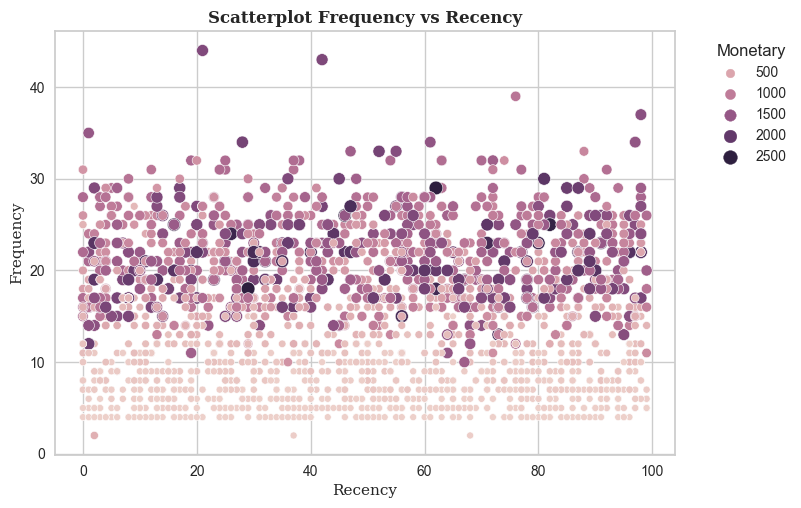

In [49]:
fig, ax = plt.subplots()

sns.scatterplot(data=dataset, x='Recency', y='frequency', hue='monetary', size='monetary', ax=ax)
ax.set_title('Scatterplot Frequency vs Recency', fontweight='bold', fontfamily='serif')
ax.set_xlabel('Recency', fontfamily='serif')
ax.set_ylabel('Frequency', fontfamily='serif')
ax.legend(title='Monetary', loc='upper right', bbox_to_anchor=(1.2,1))

plt.show()

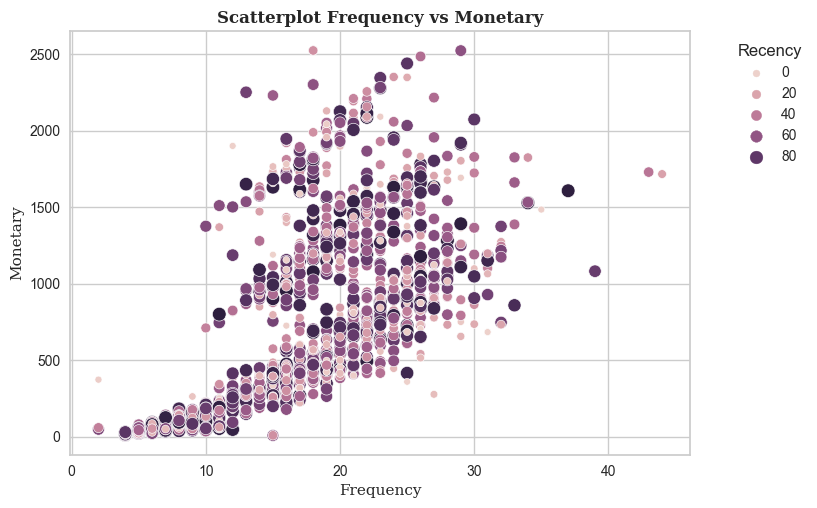

In [50]:
fig, ax = plt.subplots()

sns.scatterplot(data=dataset, x='frequency', y='monetary', hue='Recency', size='Recency', ax=ax)
ax.set_title('Scatterplot Frequency vs Monetary', fontweight='bold', fontfamily='serif')
ax.set_xlabel('Frequency', fontfamily='serif')
ax.set_ylabel('Monetary', fontfamily='serif')
ax.legend(title='Recency', loc='upper right', bbox_to_anchor=(1.2,1))

plt.show()



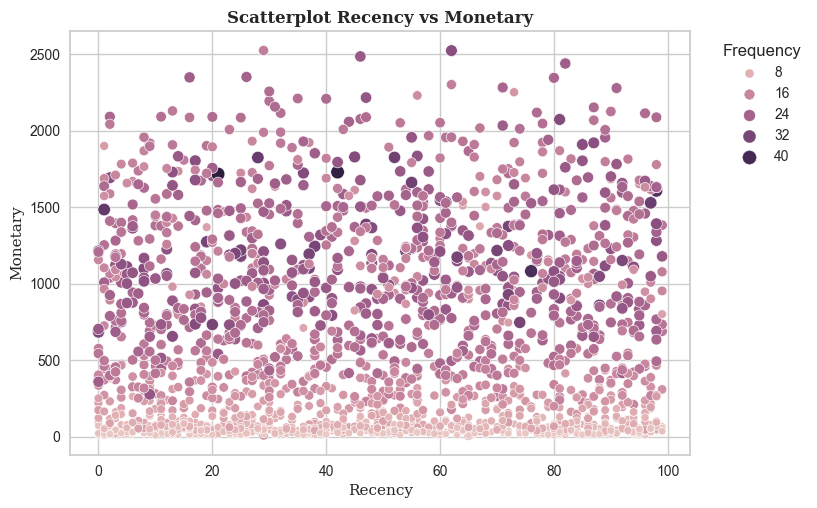

In [51]:
fig, ax = plt.subplots()

sns.scatterplot(data=dataset, x='Recency', y='monetary', hue='frequency', size='frequency', ax=ax)
ax.set_title('Scatterplot Recency vs Monetary', fontweight='bold', fontfamily='serif')
ax.set_xlabel('Recency', fontfamily='serif')
ax.set_ylabel('Monetary', fontfamily='serif')
ax.legend(title='Frequency', loc='upper right', bbox_to_anchor=(1.2,1))

plt.show()



In [149]:
## Create List of Numeric and Categoric Features
list_num_col = ['Year_Birth', 'Income', 'Recency', 'age', 'Tenure', 'frequency', 'monetary']

list_cat_col = []

for col in dataset.columns:
    if (dataset[col].dtype == 'object'):
        list_cat_col.append(col)

In [53]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming you have your dataset loaded and named 'dataset'
# Assuming you have a list 'list_num_col' containing the numeric column names

# Create subplots
fig = make_subplots(rows=4, cols=2, subplot_titles=list_num_col)

count = 0

for i in range(4):
    for j in range(2):

        if count >= len(list_num_col):
            break

        box_color = 'rgba(0, 0, 155, 0.8)'

        fig_box = px.box(dataset, x=list_num_col[count], orientation='h', points='all', color_discrete_sequence=[box_color])
        for trace in fig_box['data']:
            fig.add_trace(trace, row=i + 1, col=j + 1)

        count += 1

# Update subplot titles font and layout
for annotation in fig['layout']['annotations']:
    annotation.update(font=dict(size=14, family='calibri'))

# Update main title and layout
fig.update_layout(
    title_text='Boxplot of Numeric Features',
    title_font=dict(size=28, family='calibri'),
    title_x=.5,
    showlegend=True,
    width=1200,  # Set the width of the entire subplot grid
    height=800,  # Set the height of the entire subplot grid
)

fig.show()


Income has significant outlier with value of > 60000, we can drop row with this value

In [54]:
dataset = dataset[dataset["Income"] < 600_000]

In [55]:
dataset.shape

(2205, 32)

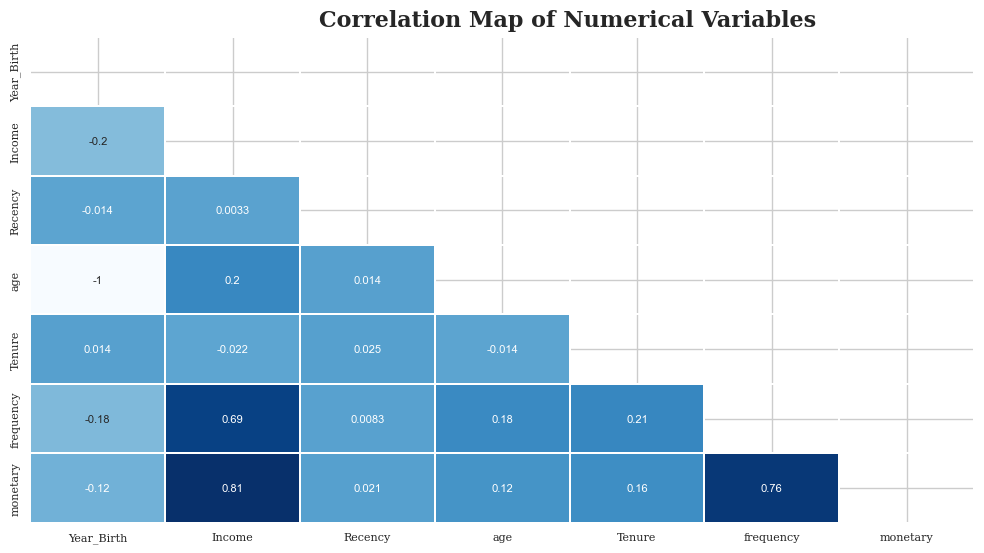

In [56]:
# -- Create Figure -- #
fig, ax = plt.subplots(figsize=(10,6))

# --- Create Correlation --- #
corr = dataset[list_num_col].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask=mask, cmap='Blues', linewidths=0.1, cbar=False, annot_kws={"size":8})

# --- Figuration Setting --- #
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=8, fontfamily='serif')
ax.set_yticklabels(ylabels, size=8, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=16, fontfamily='serif')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show()

In [57]:
import plotly.express as px

color_map = 'viridis_r'
marker_size = 10
title_font = dict(size=20, family='serif', color='black')

fig = px.scatter(dataset, x='monetary', y='Income', trendline='ols', color='frequency', color_continuous_scale=color_map)

fig.update_traces(marker=dict(size=marker_size))
fig.update_layout(title='Monetary vs Income', title_font=title_font, title_x=.5)
fig.show()

In [58]:
import plotly.express as px

color_map = 'viridis_r'
marker_size = 10
title_font = dict(size=20, family='serif', color='black')

fig = px.scatter(dataset, x='frequency', y='Income', trendline='ols', color='monetary', color_continuous_scale=color_map)

fig.update_traces(marker=dict(size=marker_size))
fig.update_layout(title='Frequency vs Income', title_font=title_font, title_x=.5)
fig.show()

In [59]:
import plotly.express as px

color_map = 'viridis_r'
marker_size = 10
title_font = dict(size=20, family='serif', color='black')

fig = px.scatter(dataset, x='frequency', y='monetary', trendline='ols', color='Recency', color_continuous_scale=color_map)

fig.update_traces(marker=dict(size=marker_size))
fig.update_layout(title='Frequency vs Monetary', title_font=title_font, title_x=.5)
fig.show()

Income - Monetary and Income - Frequency have some good positive correlation between them

<Axes: xlabel='monetary', ylabel='Density'>

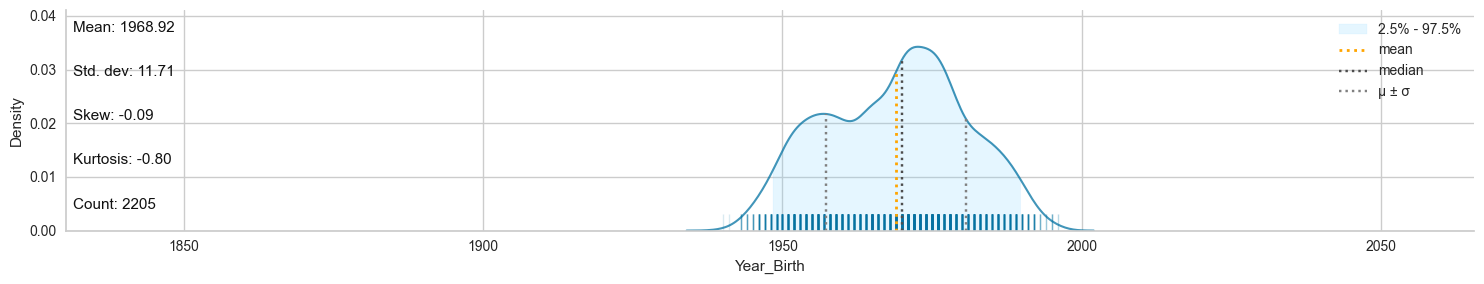

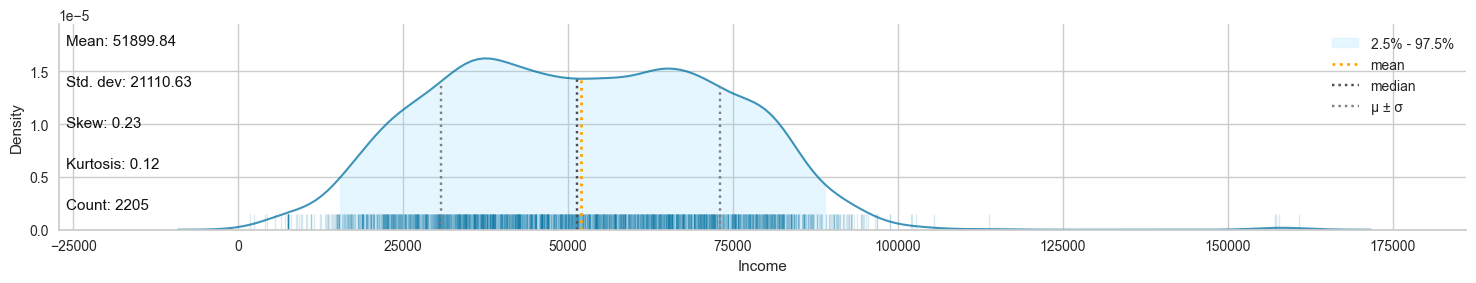

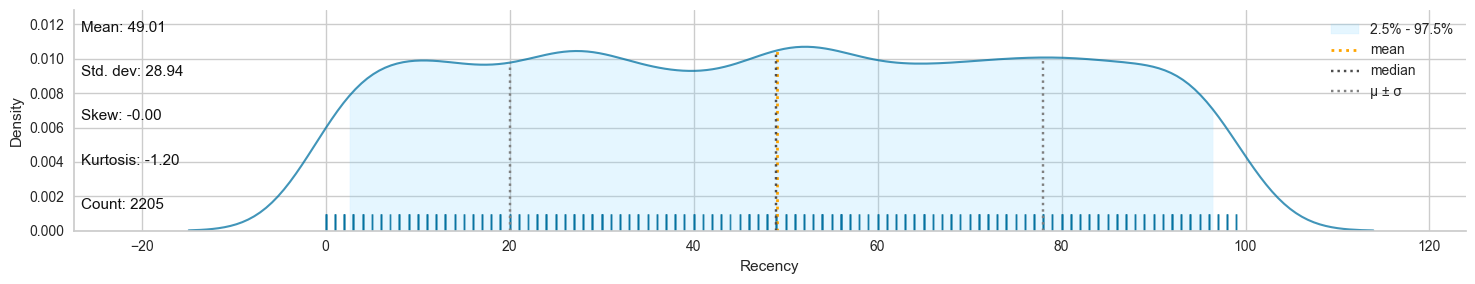

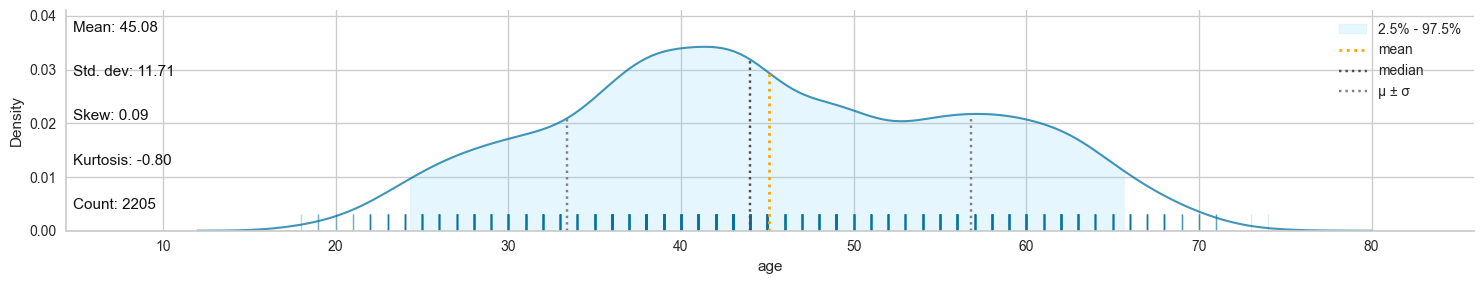

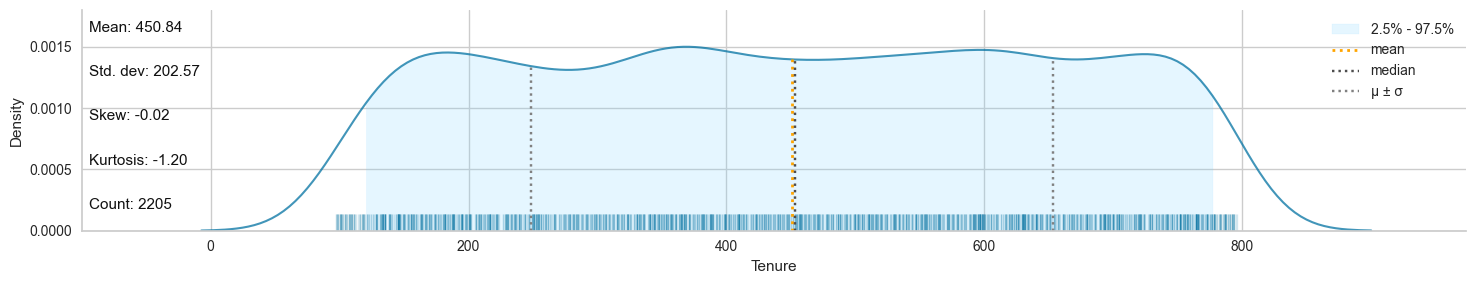

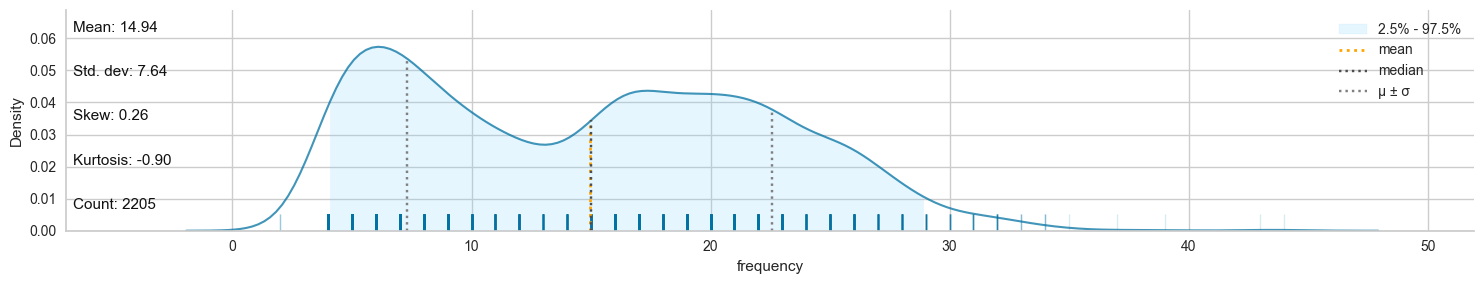

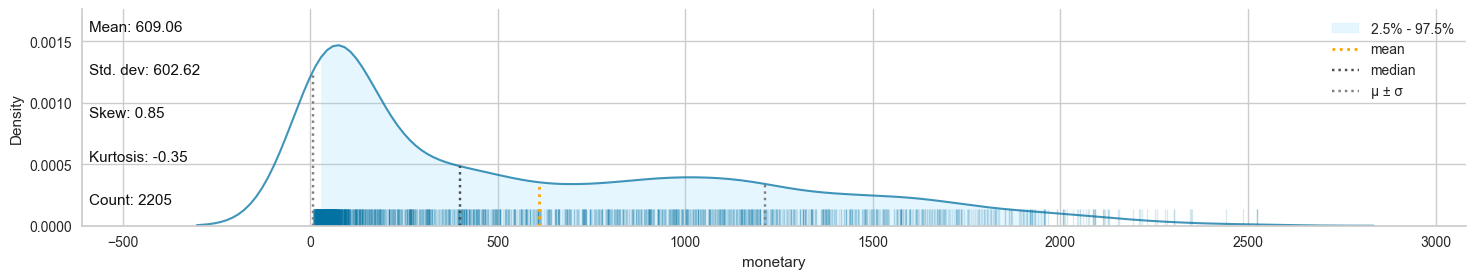

In [60]:
klib.dist_plot(dataset[list_num_col])

In [61]:
joblib.dump(dataset, 'models/dataset.pkl')

['models/dataset.pkl']

In [62]:
dataset = joblib.load('models/dataset.pkl')

# <a id='toc6_'></a>[Clustering RFM](#toc0_)

In [63]:
dataset_rfm = dataset[['Recency', 'monetary', 'frequency']]

## <a id='toc6_1_'></a>[Scaling Data](#toc0_)

In [64]:
# scaler = StandardScaler()

# dataset_rfm = scaler.fit_transform(dataset_rfm)

## <a id='toc6_2_'></a>[PCA to Visualize Cluster](#toc0_)

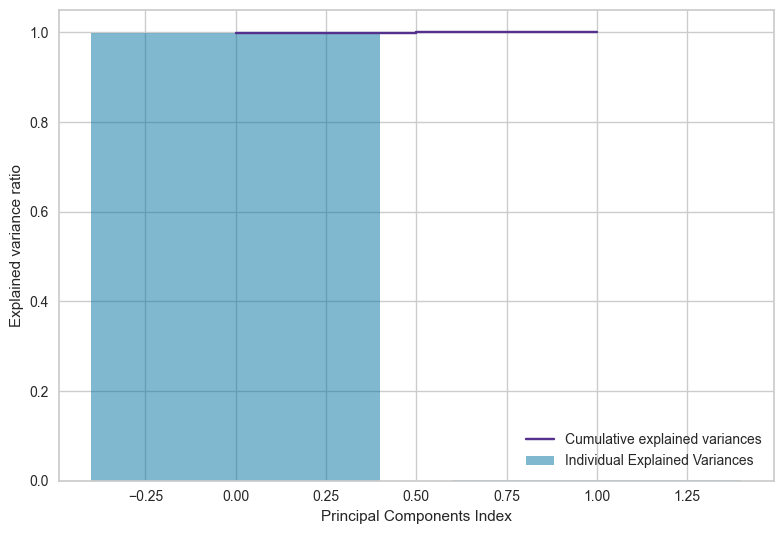

Variance explained by 2 principle components: 0.9999


In [65]:
pca = PCA(n_components=2)

rfm_cluster = pca.fit_transform(dataset_rfm)

# --- Determine explained variance ratio --- #
exp_var_pca = pca.explained_variance_ratio_

# --- Cumulative sum of eigenvalue --- #
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# --- Visualize PCA variance --- #
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual Explained Variances')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variances', color='#54318C')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print(f'Variance explained by 2 principle components: {np.round(cum_sum_eigenvalues[-1],4)}')

## <a id='toc6_3_'></a>[Clustering K-Means](#toc0_)

### <a id='toc6_3_1_'></a>[Distortion and Calinski-Harabaz Score](#toc0_)

[d3blocks] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


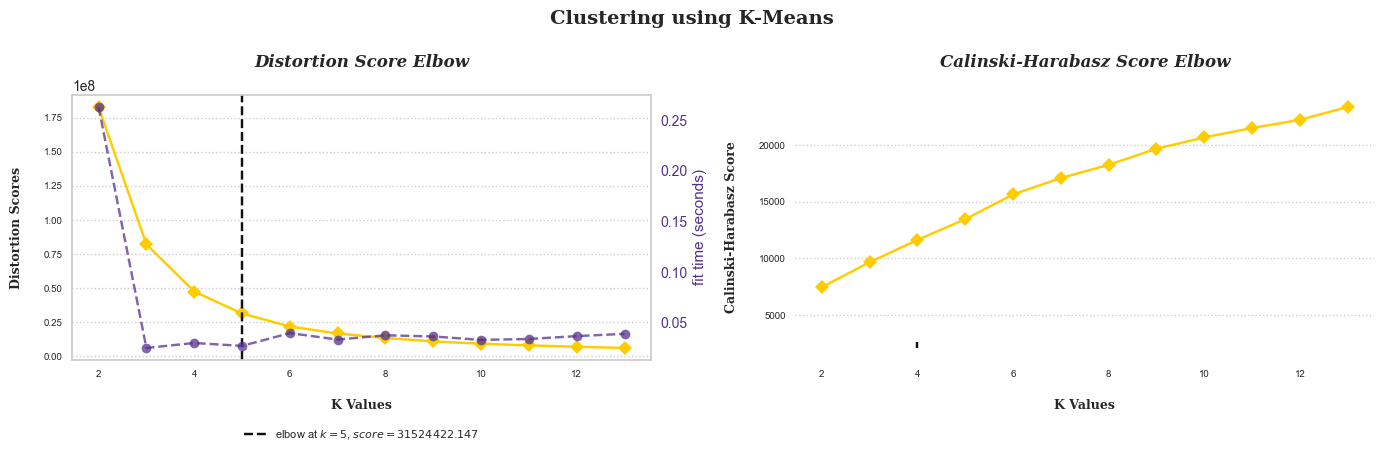

In [66]:
def k_means():
    # --- Figures Settings ---
    color_palette=['#FFCC00', '#54318C']
    set_palette(color_palette)
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # --- Elbow Score --- #
    elbow_score = KElbowVisualizer(KMeans(random_state=42, max_iter=5000), k=(2,14), ax=ax1)
    elbow_score.fit(dataset_rfm)
    elbow_score.finalize()
    elbow_score.ax.set_title('Distortion Score Elbow\n', **title)
    elbow_score.ax.tick_params(labelsize=7)
    for text in elbow_score.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score.ax.spines.values():
        spine.set_color('None')
    elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score.ax.grid(axis='x', alpha=0)
    elbow_score.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9, **text_style)

    # --- Elbow Score (Calinski-Harabaz Index) --- #
    elbow_score_ch = KElbowVisualizer(KMeans(random_state=42, max_iter=5000), k=(2,14), 
                                      metric='calinski_harabasz', timings=False, locate_elbow=False, ax=ax2)
    
    elbow_score_ch.fit(dataset_rfm)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    # for text in elbow_score_ch.ax.legend_.texts:
    #     text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.vlines(x=4, ymin=2100, ymax=2600, color='k',linestyle='dashed')
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)

    plt.suptitle('Clustering using K-Means', fontsize=14, **text_style)
    
    fig.tight_layout()
    plt.show();

# --- Calling K-Means Function --- #
k_means()
    

### <a id='toc6_3_2_'></a>[Visualize K-Means](#toc0_)

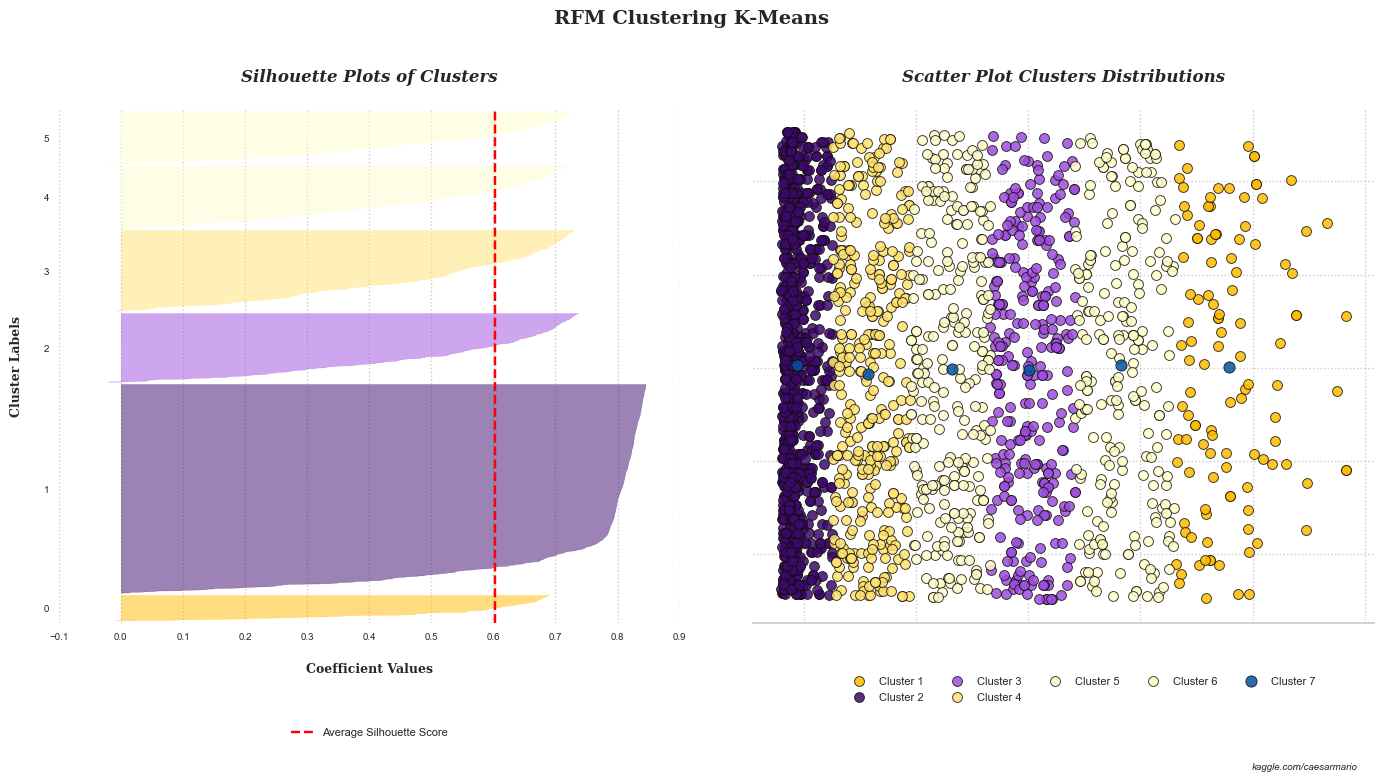

In [68]:
# --- K-means Clustering --- #
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42, max_iter=5000)
y_kmeans = kmeans.fit_predict(rfm_cluster)

def visualize_kmeans(model, y_predict):
    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270', '#FFFCCC', '#FFFFCC', '#FC096C', '#FD4EDD', '#FFF270', '#FCCCCC', '#CCCCCC']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Centroids']
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=8)
    
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 8))
    
    # --- Silhouette Plots ---
    s_viz = SilhouetteVisualizer(model, ax=ax1, colors=cluster_colors)
    s_viz.fit(rfm_cluster)
    s_viz.finalize()
    s_viz.ax.set_title('Silhouette Plots of Clusters\n', **title)
    s_viz.ax.tick_params(labelsize=7)
    for text in s_viz.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in s_viz.ax.spines.values():
        spine.set_color('None')
    s_viz.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), **legend_style)
    s_viz.ax.grid(axis='x', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    s_viz.ax.grid(axis='y', alpha=0)
    s_viz.ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
    s_viz.ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)
        
    # --- Clusters Distribution ---
    y_kmeans_labels = list(set(y_predict.tolist()))
    for i in y_kmeans_labels:
        ax2.scatter(rfm_cluster[y_predict==i, 0], rfm_cluster[y_predict == i, 1], s=50, c=cluster_colors[i], **scatter_style)
    ax2.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
    for spine in ax2.spines.values():
        spine.set_color('None')
    ax2.set_title('Scatter Plot Clusters Distributions\n', **title)
    ax2.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
    ax2.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    ax2.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['bottom'].set_color('#CAC9CD')

    # --- Suptitle & WM ---
    plt.suptitle('RFM Clustering K-Means\n', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.03, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show();

    
# --- Calling K-Means Functions ---
visualize_kmeans(kmeans, y_kmeans);

### <a id='toc6_3_3_'></a>[Scoring Kmeans](#toc0_)

In [69]:
# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(data, y):
    db_index = round(davies_bouldin_score(data, y), 3)
    s_score = round(silhouette_score(data, y), 3)
    ch_index = round(calinski_harabasz_score(data, y), 3)
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    return db_index, s_score, ch_index

kmeans = KMeans(n_clusters=6, n_init=10, random_state=42, max_iter=5000)
y_kmeans = kmeans.fit_predict(dataset_rfm)


# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(dataset_rfm, y_kmeans)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.532
.: Silhouette Score:  0.602
.: Calinski Harabasz Index:  15636.001


## <a id='toc6_4_'></a>[Clustering Gaussian Mixture](#toc0_)

### <a id='toc6_4_1_'></a>[AIC and BIC Score](#toc0_)

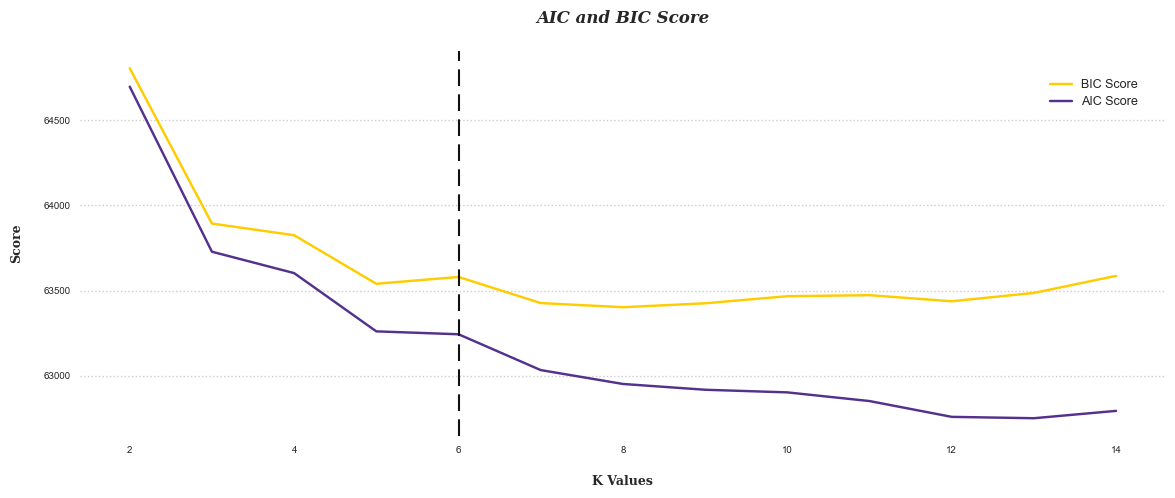

In [70]:
# --- Define K-Means Visualizer & Plots ---
def visualizer_gmix(data, n_cluster):
    
    # --- Figures Settings ---
    color_palette=['#FFCC00', '#54318C']
    set_palette(color_palette)
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig, ax = plt.subplots(figsize=(14, 5))

    bic = []
    aic = []
    for i in range(2, n_cluster+1):
        gmix = GaussianMixture(n_components=i, n_init=10, random_state=42)
        gmix.fit(data)
        bic.append([i, gmix.bic(data)])
        aic.append([i, gmix.aic(data)])

    ax.plot([sublist[0] for sublist in bic], [sublist[1] for sublist in bic], label='BIC Score')
    ax.plot([sublist[0] for sublist in aic], [sublist[1] for sublist in aic], label='AIC Score', color='#54318C')

    ax.set_title('AIC and BIC Score\n', **title)
    ax.tick_params(labelsize=7)
    ax.legend(loc='upper right', borderpad=2, frameon=False, fontsize=8)
    for text in ax.legend_.texts:
        text.set_fontsize(9)
    for spine in ax.spines.values():
        spine.set_color('None')
        
    ax.axvline(x=6, color='k', linestyle='dashed', linewidth=1.5, dashes=(8, 4))
    ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    ax.grid(axis='x', alpha=0)
    ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    ax.set_ylabel('Score\n', fontsize=9, **text_style)
    plt.show()

    
# --- Calling K-Means Functions ---
visualizer_gmix(dataset_rfm, 14);

### <a id='toc6_4_2_'></a>[**Visualize GMM**](#toc0_)

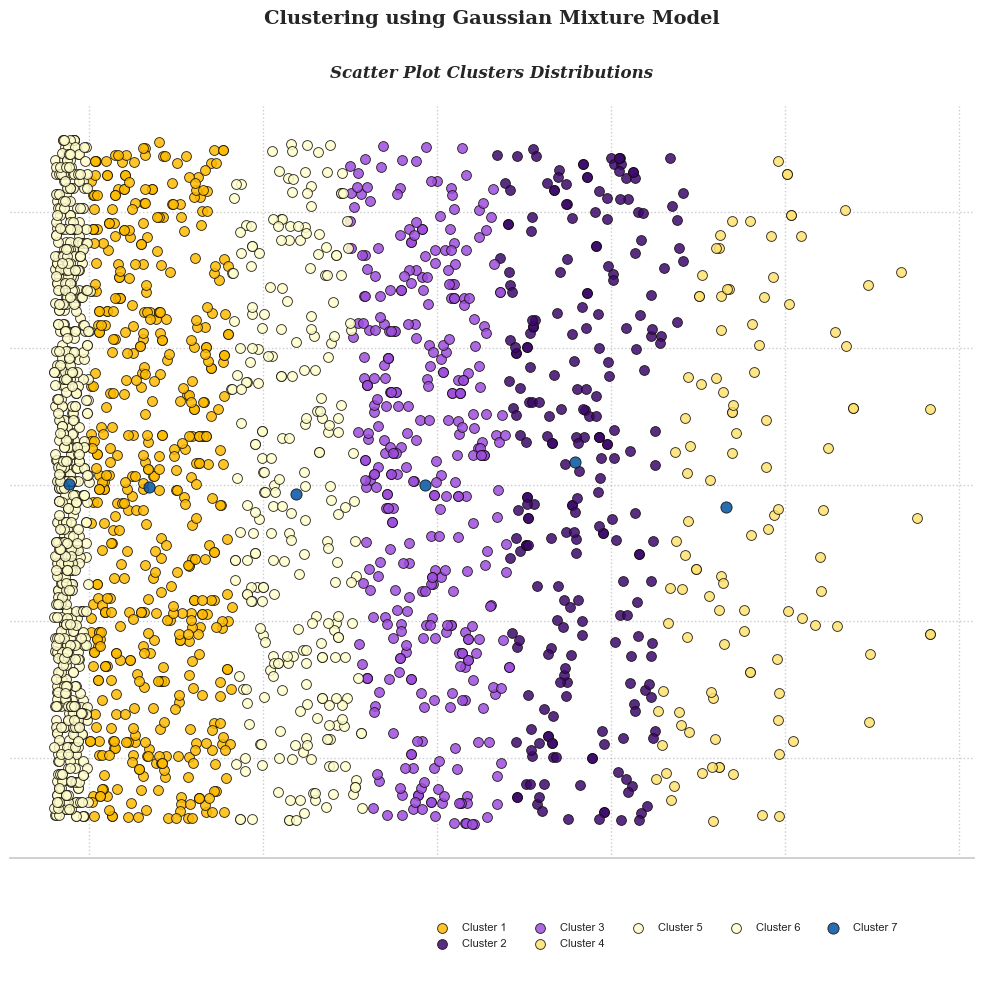

In [71]:
gmix = GaussianMixture(n_components=6, n_init=10, random_state=32)
y_gmix = gmix.fit_predict(rfm_cluster)

fig, ax = plt.subplots(figsize=(10, 10))

cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270', '#FFFCCC', '#FFFFCC', '#FC096C', '#FD4EDD', '#FFF270', '#FCCCCC', '#CCCCCC']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Centroids']
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
text_style=dict(fontweight='bold', fontfamily='serif')
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
legend_style=dict(borderpad=2, frameon=False, fontsize=8)

y_gmix_labels = list(set(y_gmix.tolist()))
for i in y_gmix_labels:
    ax.scatter(rfm_cluster[y_gmix==i, 0], rfm_cluster[y_gmix == i, 1], s=50, c=cluster_colors[i], **scatter_style)
ax.scatter(gmix.means_[:, 0], gmix.means_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
for spine in ax.spines.values():
    spine.set_color('None')
ax.set_title('Scatter Plot Clusters Distributions\n', **title)
ax.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
ax.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
ax.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('#CAC9CD')

plt.suptitle('Clustering using Gaussian Mixture Model\n', fontsize=14, **text_style)
plt.tight_layout()
plt.show()

### <a id='toc6_4_3_'></a>[Scoring Gaussian Mixture](#toc0_)

In [73]:
gmix = GaussianMixture(n_components=6, n_init=10, random_state=32)
y_gmix = gmix.fit_predict(dataset_rfm)

# --- Evaluate Gaussian Mixture Cluster Quality ---
db_gmix, ss_gmix, ch_gmix = evaluate_clustering(dataset_rfm, y_gmix)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  1.651
.: Silhouette Score:  0.29
.: Calinski Harabasz Index:  3891.494


## <a id='toc6_5_'></a>[Hierarchical Clustering](#toc0_)

### <a id='toc6_5_1_'></a>[Calinski-Harabaz Score](#toc0_)

[d3blocks] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


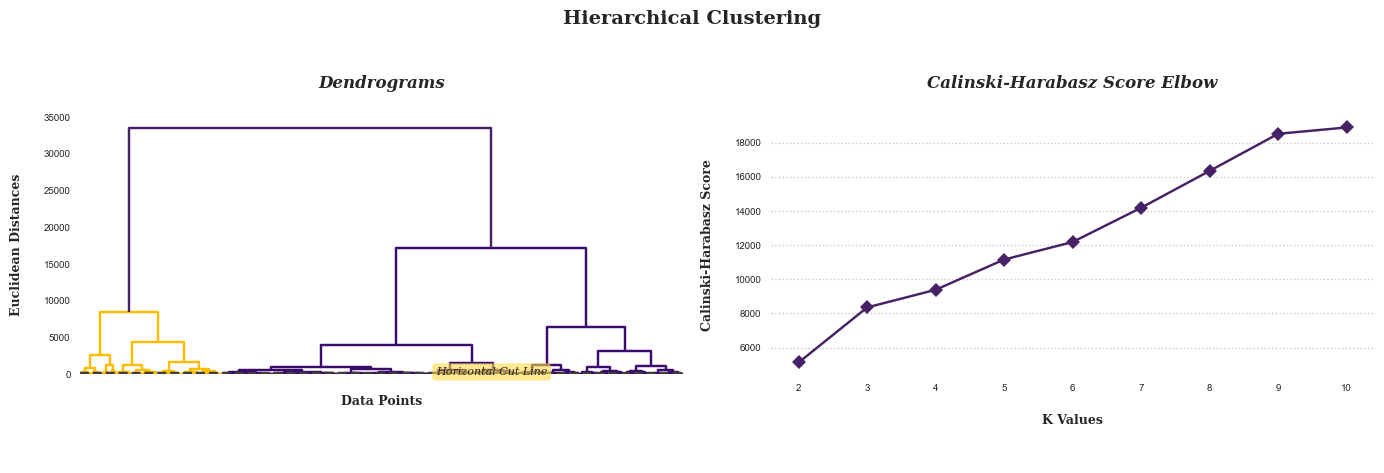

In [75]:
# --- Define Dendrogram ---
def agg_dendrogram():
    
    # --- Figure Settings ---
    color_palette=['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
    set_palette(color_palette)
    text_style=dict(fontweight='bold', fontfamily='serif')
    ann=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    fig=plt.figure(figsize=(14, 5))
    
    # --- Dendrogram Plot ---
    ax1=fig.add_subplot(1, 2, 1)
    dend=shc.dendrogram(shc.linkage(dataset_rfm, method='ward', metric='euclidean'))
    plt.axhline(y=115, color='#3E3B39', linestyle='--')
    plt.xlabel('\nData Points', fontsize=9, **text_style)
    plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
    plt.annotate('Horizontal Cut Line', xy=(15000, 130), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
    plt.tick_params(labelbottom=False)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.tick_params(labelsize=7)
    plt.title('Dendrograms\n', **title)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    ax2=fig.add_subplot(1, 2, 2)
    elbow_score_ch = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(dataset_rfm)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)
    
    plt.suptitle('Hierarchical Clustering\n', fontsize=14, **text_style)
    plt.tight_layout()
    plt.show();

# --- Calling Dendrogram Functions ---
agg_dendrogram();

### <a id='toc6_5_2_'></a>[Visualize Hierarchical](#toc0_)

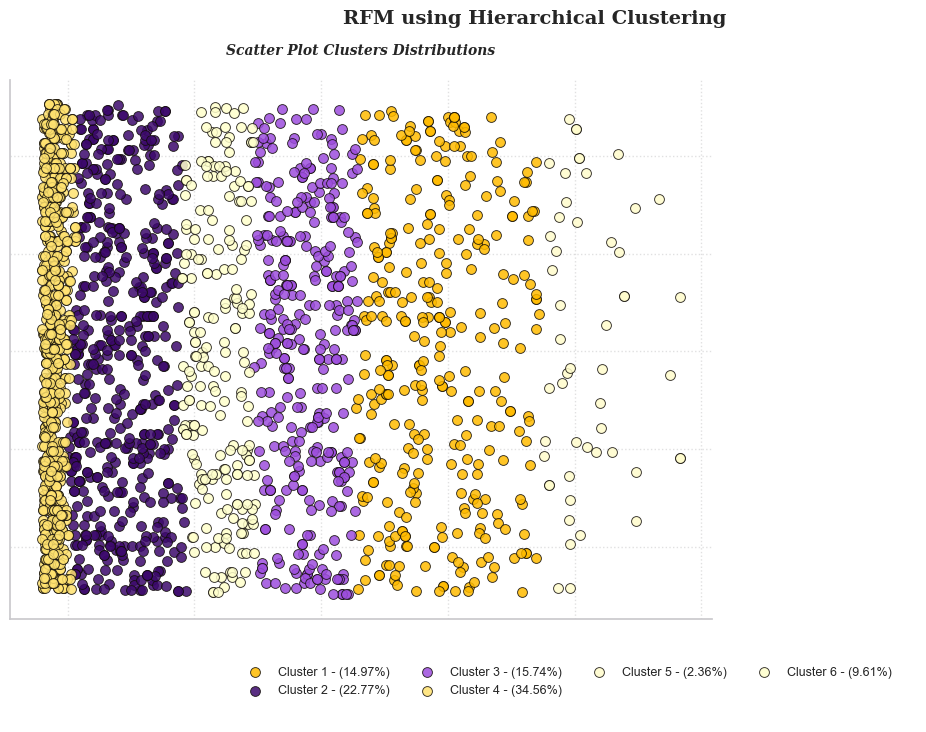

In [77]:
# --- Implementing Hierarchical Clustering ---
agg_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(rfm_cluster)
    
# --- Define Hierarchical Clustering Distributions ---
def agg_visualizer(agg_cluster, y_agg_cluster):
    
    # --- Figures Settings ---
    cluster_colors=['#FFBB00', '#3C096C', '#9D4EDD', '#FFE270', '#FFFCCC', '#FFFFCC', '#FC096C', '#FD4EDD', '#FFF270', '#FCCCCC', '#CCCCCC']
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10', 'Cluster 11', 'Centroids']
    suptitle=dict(fontsize=14, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=10, fontweight='bold', style='italic', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=9)
    fig=plt.figure(figsize=(14, 7))
    
    # --- Percentage Labels ---
    unique, counts = np.unique(y_agg_cluster, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    # --- Clusters Distribution ---
    y_agg_labels = list(set(y_agg_cluster.tolist()))
    ax1=fig.add_subplot(1, 3, (1, 2))
    for i in y_agg_labels:
        ax1.scatter(rfm_cluster[y_agg_cluster==i, 0], rfm_cluster[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    for spine in ax1.spines.values():
        spine.set_color('None')
    for spine in ['bottom', 'left']:
        ax1.spines[spine].set_visible(True)
        ax1.spines[spine].set_color('#CAC9CD')
    ax1.legend([f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], bbox_to_anchor=(1.3, -0.03), ncol=4, **legend_style)
    ax1.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax1.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Scatter Plot Clusters Distributions\n', **title)
    
    plt.suptitle('RFM using Hierarchical Clustering\n', **suptitle)
    plt.show()
    
# --- Calling Hierarchical Clustering Functions ---
agg_visualizer(agg_cluster, y_agg_cluster)

### <a id='toc6_5_3_'></a>[Scoring Hierarchical Clustering](#toc0_)

In [78]:
agg_cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(dataset_rfm)

# --- Evaluate DBSCAN Cluster Quality ---
db_agg, ss_agg, ch_agg = evaluate_clustering(dataset_rfm, y_agg_cluster)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.618
.: Silhouette Score:  0.48
.: Calinski Harabasz Index:  19412.611


## <a id='toc6_6_'></a>[Model Evaluation](#toc0_)

In [79]:
# --- Comparison Table ---
compare = pd.DataFrame({'Model': ['K-Means', 'Gaussian Mixture', 'Hierarchical Clustering'], 
                        'Davies-Bouldin Index': [db_kmeans, db_gmix, db_agg],
                        'Silhouette Score': [ss_kmeans, ss_gmix, ss_agg],
                       'Calinski-Harabasz Index': [ch_kmeans, ch_gmix, ch_agg]})

# --- Create Accuracy Comparison Table ---
print(clr.start+'.: Model Accuracy Comparison :.'+clr.end)
print(clr.color+'*' * 32+clr.end)
compare.sort_values(by='Model', ascending=False).style.background_gradient(cmap='inferno_r').hide_index().set_properties(**{'font-family': 'Segoe UI'})

.: Model Accuracy Comparison :.
********************************


# <a id='toc7_'></a>[RFM Segmentation](#toc0_)

### <a id='toc7_1_1_'></a>[RFM By K-Means Clustering](#toc0_)

In [80]:
dataset_cluster = pd.concat([dataset, pd.DataFrame(kmeans.labels_)], axis=1)

In [81]:
rfm_cluster = pd.concat([dataset[['Recency', 'monetary', 'frequency']], pd.DataFrame(kmeans.labels_)], axis=1)

In [82]:
rfm_cluster.dropna()

Recency  monetary  frequency    0
0        58.0    1617.0       25.0  5.0
1        38.0      27.0        6.0  1.0
2        26.0     776.0       21.0  4.0
3        26.0      53.0        8.0  1.0
4        94.0     422.0       19.0  3.0
...       ...       ...        ...  ...
2200     71.0     106.0        8.0  5.0
2201      0.0     704.0       26.0  3.0
2202      3.0     424.0       19.0  2.0
2203     88.0     849.0       23.0  4.0
2204     15.0      85.0        6.0  1.0

[2173 rows x 4 columns]

## <a id='toc7_2_'></a>[**RFM on Quantiles**](#toc0_)

- **Recency**, will rate more recently more better than the less recent customer

- **Frequency**, rate the higher label to rate more often the purchase more better

- **Monetary**, rate the higher label to rate more money spent more better

Reference:<br>
[RFM Segment](https://www.putler.com/rfm-analysis/#Applying_the_RFM_score_formula)<br>
[RFM Analysis](https://www.analyticsvidhya.com/blog/2021/07/customer-segmentation-using-rfm-analysis/)

In [83]:
r_labels = range(4, -1, -1)
f_labels = range(0, 5)
m_labels = range(0, 5)

In [84]:
r_quartiles = pd.qcut(dataset['Recency'], q=5, labels = r_labels)
f_quartiles = pd.qcut(dataset['frequency'], q=5, labels = f_labels)
m_quartiles = pd.qcut(dataset['monetary'], q=5, labels = m_labels)

In [85]:
dataset_rfm = dataset_rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)

### <a id='toc7_2_1_'></a>[RFM Segment](#toc0_)
------

In [86]:
dataset_rfm['RFM_Score'] = dataset_rfm[['R', 'F', 'M']].sum(axis=1)
dataset_rfm['RFM_Segment'] = ''

for i in dataset_rfm.index:

    dataset_rfm['RFM_Segment'][i] = str(dataset_rfm.R[i]) + str(dataset_rfm.F[i]) + str(dataset_rfm.M[i])

In [87]:
dataset_rfm.head()

Recency  monetary  frequency  R  F  M  RFM_Score RFM_Segment
0       58      1617         25  2  4  4         10         244
1       38        27          6  3  0  0          3         300
2       26       776         21  3  3  3          9         333
3       26        53          8  3  1  0          4         310
4       94       422         19  0  3  2          5         032

In [88]:
dataset_rfm.groupby('RFM_Score').agg({'Recency':'mean', 'frequency':'mean', 'monetary': ['mean', 'count']}).round(0)

Recency frequency monetary      
             mean      mean     mean count
RFM_Score                                 
0            89.0       5.0     35.0    76
1            77.0       6.0     47.0   116
2            66.0       7.0     68.0   172
3            51.0       8.0     84.0   201
4            42.0       9.0    136.0   213
5            45.0      12.0    269.0   197
6            50.0      15.0    514.0   220
7            61.0      19.0    874.0   239
8            52.0      21.0   1039.0   266
9            37.0      21.0   1110.0   188
10           28.0      23.0   1307.0   165
11           15.0      24.0   1292.0   130
12            9.0      27.0   1546.0    22

### <a id='toc7_2_2_'></a>[Segmentation Customer](#toc0_)
------

In order to keep a manageable number of segments, the segments are created using only the **recency** and **frequency** scores.  
The **monetary score** is often viewed as an aggregation metric for summarizing transactions.

<img src='RFM Segment.png' width=600>


In [89]:
## --- Recency + Frequency --- ##

segmentation = {
    r'44': 'Champions',

    r'43': 'Loyal customers',
    r'34': 'Loyal customers',
    r'33': 'Loyal customers',
    r'24': 'Loyal customers',
    r'23': 'Loyal customers',

    r'32': 'Potential loyalist',
    r'31': 'Potential loyalist',
    r'42': 'Potential loyalist',

    r'41': 'Recent Customers',
    r'40': 'Recent Customers',
    
    r'30': 'Promising',
    
    r'22': 'Needing attention',
    r'21': 'Needing attention',

    r'12': 'About to sleep',
    r'20': 'About to sleep',

    r'02': 'At risk',
    r'03': 'At risk',
    r'13': 'At risk',

    r'14': 'Cant loose them',
    r'04': 'Cant loose them',

    r'11': 'Hibernating',

    r'10': 'Lost',
    r'00': 'Lost',
    r'01': 'Lost',
}

In [90]:
dataset_rfm['Segment'] = ''

for i in dataset_rfm.index:

    dataset_rfm['Segment'][i] = str(dataset_rfm['R'][i]) + str(dataset_rfm['F'][i])

dataset_rfm['Segment'] = dataset_rfm['Segment'].replace(segmentation, regex=True)

dataset_rfm.head()

Recency  monetary  frequency  R  F  M  RFM_Score RFM_Segment  \
0       58      1617         25  2  4  4         10         244   
1       38        27          6  3  0  0          3         300   
2       26       776         21  3  3  3          9         333   
3       26        53          8  3  1  0          4         310   
4       94       422         19  0  3  2          5         032   

              Segment  
0     Loyal customers  
1           Promising  
2     Loyal customers  
3  Potential loyalist  
4             At risk

In [91]:
dataset_rfm.groupby('Segment').agg({'Recency':'mean', 'frequency':'mean', 'monetary':['mean','count']}).round(0)

Recency frequency monetary      
                      mean      mean     mean count
Segment                                            
About to sleep        57.0      10.0    367.0   192
At risk               81.0      19.0    962.0   268
Cant loose them       80.0      26.0   1199.0   162
Champions              9.0      26.0   1054.0    77
Hibernating           71.0      10.0    203.0    82
Lost                  82.0       7.0     73.0   290
Loyal customers       33.0      23.0   1111.0   436
Needing attention     50.0      13.0    430.0   145
Potential loyalist    22.0      14.0    529.0   249
Promising             30.0       5.0     39.0   106
Recent Customers       9.0       7.0     95.0   198

### <a id='toc7_2_3_'></a>[RFM Segment Percentation](#toc0_)

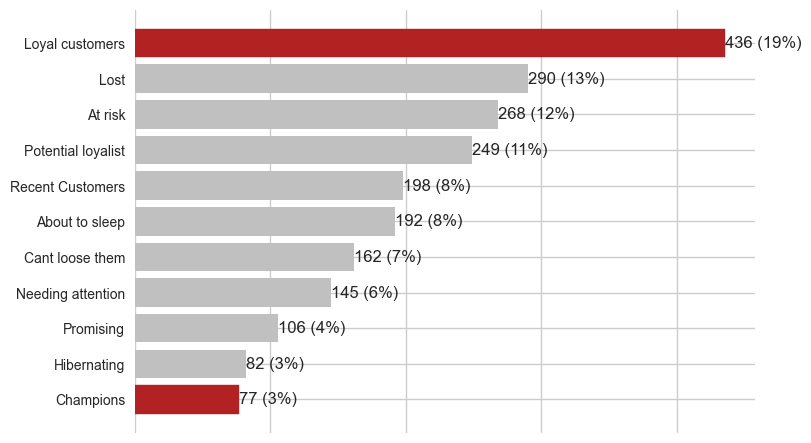

In [92]:
# count the number of customers in each segment
segments_counts = dataset_rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Champions', 'Loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [93]:
dataset_rfm_map = dataset_rfm.groupby('Segment').agg({
    'Recency' : 'mean',
    'frequency' : 'mean',
    'monetary' : ['mean', 'count'],
}).round(2)

In [94]:
dataset_rfm_map

Recency frequency monetary      
                      mean      mean     mean count
Segment                                            
About to sleep       57.48      9.65   367.33   192
At risk              80.66     18.74   961.76   268
Cant loose them      79.61     26.00  1199.25   162
Champions             8.83     26.14  1054.16    77
Hibernating          71.07      9.88   203.34    82
Lost                 82.24      6.81    72.54   290
Loyal customers      33.21     22.51  1111.40   436
Needing attention    49.53     12.69   430.05   145
Potential loyalist   22.06     13.62   528.74   249
Promising            29.81      5.46    39.26   106
Recent Customers      9.34      7.22    94.89   198

### <a id='toc7_2_4_'></a>[RFM Segment Map](#toc0_)

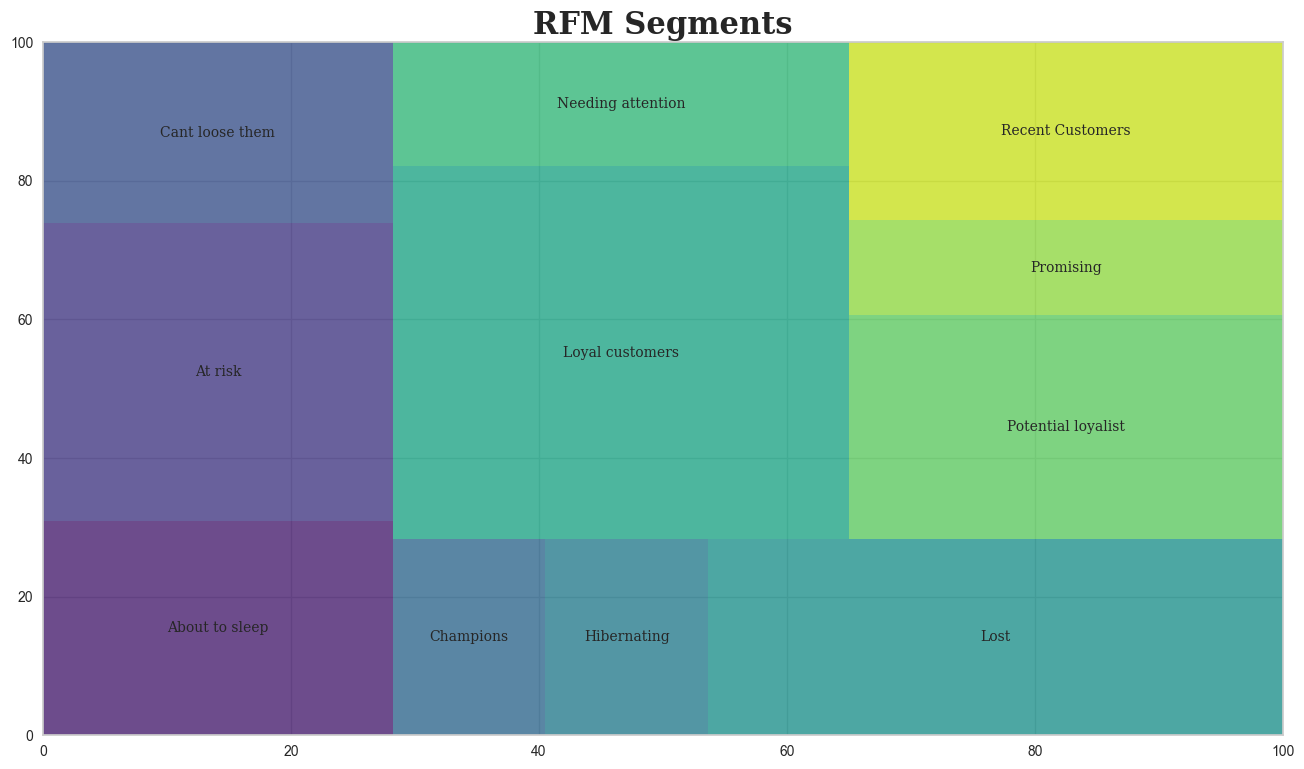

In [235]:
dataset_rfm_map.columns = ['Recencymean','Frequencymean', 'Monetarymean','Count']
fig, ax = plt.subplots()

fig.set_size_inches(16, 9)
squarify.plot(sizes=dataset_rfm_map['Count'], 
              label=dataset_rfm_map.index, alpha=.8 ,
                color = sns.color_palette('viridis', len(dataset_rfm_map.index)),
                text_kwargs={'fontfamily':'serif', 'fontsize': 10}
)
plt.title("RFM Segments",fontsize=22,fontweight="bold", fontfamily="serif")
plt.axis('on')
plt.show()

In [96]:
joblib.dump(dataset_rfm, 'models/dataset_rfm.pkl')

['models/dataset_rfm.pkl']

In [97]:
dataset_rfm = joblib.load('models/dataset_rfm.pkl')

# <a id='toc8_'></a>[Customer Lifetime Value (CLV) Modelling](#toc0_)

To calculate CLV, we will retrieve the "DT_Customer" which will help us calculate the Recency and Age variables in our BTYD model.  
`Note that Recency that we will use in our BTYD model is different that the one we used in our RFM segmentation `

In [98]:
dataset = joblib.load('models/dataset.pkl')

In [99]:
dataset_rfm_clv = pd.concat([dataset_rfm, dataset[['ID']]], axis=1)

In [100]:
dataset_clv = dataset_rfm_clv.merge(dataset[['ID', 'Dt_Customer']], on='ID')
dataset_clv.head()

Recency  monetary  frequency  R  F  M  RFM_Score RFM_Segment  \
0       58      1617         25  2  4  4         10         244   
1       38        27          6  3  0  0          3         300   
2       26       776         21  3  3  3          9         333   
3       26        53          8  3  1  0          4         310   
4       94       422         19  0  3  2          5         032   

              Segment    ID Dt_Customer  
0     Loyal customers  5524  2012-09-04  
1           Promising  2174  2014-03-08  
2     Loyal customers  4141  2013-08-21  
3  Potential loyalist  6182  2014-02-10  
4             At risk  5324  2014-01-19

## <a id='toc8_1_'></a>[BG/NBD Model](#toc0_)
---------

**Pareto/NBD Model** (aka **SMC Model**) describes repeat-buying behavior in settings where customer dropout is unobserved, it assumes that customers buy a steady rate for a period of time, and then become inactive.

* Time to `"Churn"` is modelled using the **Pareto (Exponential-gamma mixture)** timing model, and 
* `"repeat-buying"` behavior while active is modelled using **NBD (Poisson-Gamma Mixture)**

Pareto/NBD Model tell what is the probability of future number of purchase made by customer (projection of frequency) and what is the probability of the customer still being active in period of time

**Beta-Geometric/Negative Binomial Distribution** or **BG/NBD** Model is sligthly difference with Pareto/NBD, the only difference lies on probability of how customer being inactive. Pareto assumes that churn can occur at any time (even before his first purchase) while BG assumes churn can occurs immediately after a purchase.

The **Pareto/NBD** or **BG/NBD** requires two parameters about each customer’s past purchasing history: his
**`“recency”`** (when his last transaction occurred) and **`“frequency”`** (how many transactions he made in a specified time period)

----

**BG/NBD** or **BTYD** model is built on 4 metrics which are closely related to the ones used for RFM segmentation :
- ```Frequency``` : represents the number of repeat purchases the customer has made. This means that it's one less than the total number of purchases. It's the count of time periods the customer had a purchase in. So if using days as units, then it's the count of days the customer had a purchase on. <br>
    &emsp;&emsp;&emsp;*Frequency = frequency - 1*

- `Tenure (days)` : represents the period of the customer has been enrolled in whatever time units chosen (days). This is equal to the duration between a customer's first purchase and the end of the period under observation. <br>
    &emsp;&emsp;&emsp;*Tenure = Last date in dataset - first customer purchase date*
    
- `Recency (days)` : represents the period of the customer when they made their most recent purchases. This is equal to the duration between a customer's first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)<br>
    &emsp;&emsp;&emsp;*Recency = Last customer purchase date - first customer purchase date*

- `Monetary value` : represents the average value of a given customer's purchases. This is equal to the sum of all a customer's purchases divided by the total number of purchases. <br>
    &emsp;&emsp;&emsp;*Monetary value = monetary / frequency*

In [101]:
Last_date = dt.date(2014,10,4) # end of period under observation

# --- Calculate difference days between last date and Dt_Customer --- # 
dataset_clv['Tenure'] = pd.to_datetime(dataset_clv['Dt_Customer'], dayfirst=True, format='%Y-%m-%d')
dataset_clv['Tenure'] = pd.to_numeric(dataset_clv['Tenure'].dt.date.apply(lambda x: (Last_date - x)).dt.days, downcast="integer")

# --- Calculate Recency from difference days between Tenure and Recency (number of days since latest purchase) --- #
dataset_clv['U_Recency'] = dataset_clv['Tenure'] - dataset_clv["Recency"]

# --- Derived avg monetary spent by Monetary (Total Amount of purchases) / Frequency (Number of purchases) --- #
dataset_clv['Monetary_value'] = dataset_clv["monetary"] / dataset_clv['frequency']

# --- Update Frequency by -1 --- #
dataset_clv["U_Frequency"] = dataset_clv['frequency'] - 1

In [230]:
dataset_clv.head()

Recency  monetary  frequency  R  F  M  RFM_Score RFM_Segment  \
0       58      1617         25  2  4  4         10         244   
1       38        27          6  3  0  0          3         300   
2       26       776         21  3  3  3          9         333   
3       26        53          8  3  1  0          4         310   
4       94       422         19  0  3  2          5         032   

              Segment    ID Dt_Customer  Tenure  U_Recency  Monetary_value  \
0     Loyal customers  5524  2012-09-04     760        702       64.680000   
1           Promising  2174  2014-03-08     210        172        4.500000   
2     Loyal customers  4141  2013-08-21     409        383       36.952381   
3  Potential loyalist  6182  2014-02-10     236        210        6.625000   
4             At risk  5324  2014-01-19     258        164       22.210526   

   U_Frequency  
0           24  
1            5  
2           20  
3            7  
4           18

### <a id='toc8_1_1_'></a>[**BG/NBD Assumptions**](#toc0_)
----------

**BG/NBD** Model is based on 5 assumptions:
<blockquote>

1. While active, number of transactions made by customer follows <b>Poisson Process</b> with <b>transaction rate λ</b>

2. Heterogenity in <b>λ</b> follows a `gamma distribution with pdf`

3. After a transaction, a customer become inactive with <b>probability <i>p</i></b>. Therefore the point at which customer `churn` is distributed across transactions according to `shifted geometric distribution with pmf`.

4. Heterogenity in <b><i>p</i></b> follows a `beta distribution with pdf`.

5. The <b>transaction rate λ</b> and <b>churn probability <i>p</i></b> vary independently across customers.
</blockquote>

------

**BG/NBD Model** derive number of quantities for each customer, such as:

* $P(X(t)=x|λ, p)$ <br> 
&emsp;&emsp;&emsp; erlang-cdf that represent probability of observing $x$ transactions in a time period $t$ (Derived by $P(X(t)=x)$)

* $P(τ > t)$ = $P(active \ at \ t|λ, p$) <br> 
&emsp;&emsp;&emsp; probability of a customer becomes inactive at $τ$ (Derived by Conditional prob on $λ$ and $p$)

* $E[X(t)|λ, p]$ <br>
&emsp;&emsp;&emsp; is the expected number of transactions in a time period of length $t$ (Derived by $E[Y(t) | X = x, t_x, T]$)

-----

In [103]:
dataset_btyd = dataset_clv[['ID', 'U_Frequency', 'U_Recency', 'Tenure', 'Monetary_value', 'Segment']]

In [104]:
dataset_btyd = dataset_btyd.loc[~(dataset_btyd['U_Frequency']==0)]
dataset_btyd = dataset_btyd.loc[~(dataset_btyd['U_Frequency']==-1)]

### <a id='toc8_1_2_'></a>[Retention Model (Beta Geofitter)](#toc0_)

-----

For small samples sizes, the parameters can get implausibly large, so by adding an **l2 penalty the likelihood**, we can control how large these parameters can be. 

This is implemented as setting as positive **penalizer_coef** in the initialization of the model. In typical applications, penalizers on the order of 0.001 to 0.1 are effective.

In [105]:
bg = BetaGeoFitter(penalizer_coef=0.000000005)
bg.fit(dataset_btyd['U_Frequency'], dataset_btyd['U_Recency'], dataset_btyd['Tenure'])

<lifetimes.BetaGeoFitter: fitted with 2205 subjects, a: 5.81, alpha: 36.56, b: 493.91, r: 1.59>

<Axes: title={'center': 'mean: 0.044, var: 0.001'}, xlabel='Transaction Rate', ylabel='Density'>

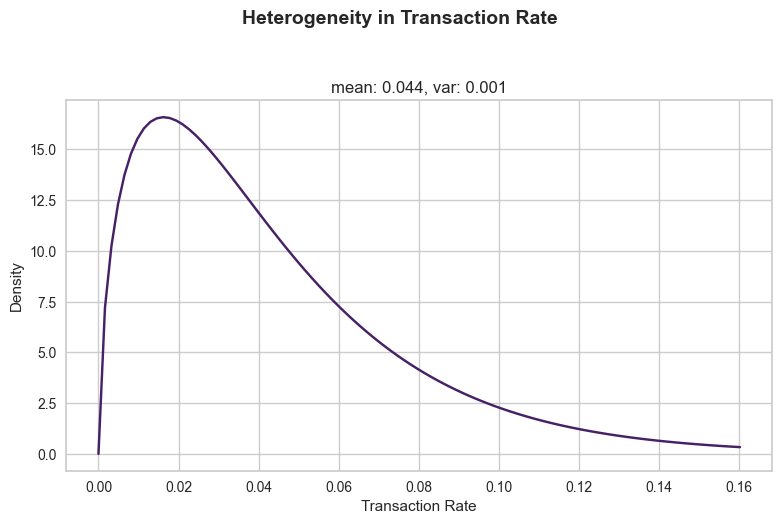

In [106]:
# plot the estimated gamma distribution of λ (customers' propensities to purchase)
plot_transaction_rate_heterogeneity(bg)

In [228]:
bg.summary

coef    se(coef)  lower 95% bound  upper 95% bound
r        1.593852    0.053574         1.488847         1.698857
alpha   36.555985    1.512240        33.591994        39.519975
a        5.806414    1.509411         2.847969         8.764859
b      493.907459  124.049154       250.771117       737.043801

### <a id='toc8_1_3_'></a>[Visualizing Frequency/Recency matrix](#toc0_)

-----
Consider: a customer bought from you every day for three weeks straight, and we haven't heard from them in months. What are the chances they are still "alive"? `Pretty small`. 

On the other hand, a customer who historically buys from you once a quarter, and bought last quarter, is likely still alive. 

We can visualize this relationship using the Frequency/Recency matrix, which computes the expected number of transactions an artificial customer is to make in the next time period, given his or her recency (age at last purchase) and frequency (the number of repeat transactions he or she has made).

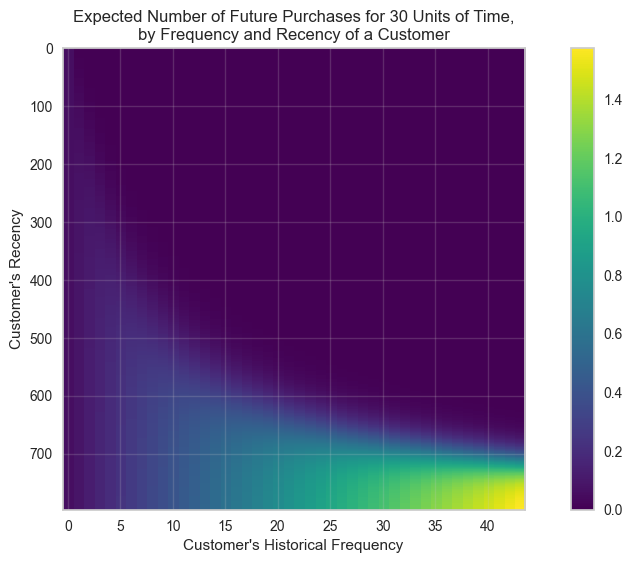

In [108]:
# visualize our frequency/recency matrix
map_plot = dict(cmap='viridis')

fig, ax = plt.subplots(figsize=(12,6))
g = plot_frequency_recency_matrix(bg, T = 30, **map_plot)
ax.grid(alpha=.2)

plt.show()

We can see that if a customer has bought 40 times, and their latest purchase was when they were 700 days old (given the individual is 700 days old), then they are your best customer (bottom-right). Your coldest customers are those that are in the top-right corner: they bought a lot quickly, and we haven't seen them in weeks.

There's also that beautiful "tail" around (5). That represents the customer who buys infrequently, but we've seen him or her recently, so they might buy again - we're not sure if they are dead or just between purchases.

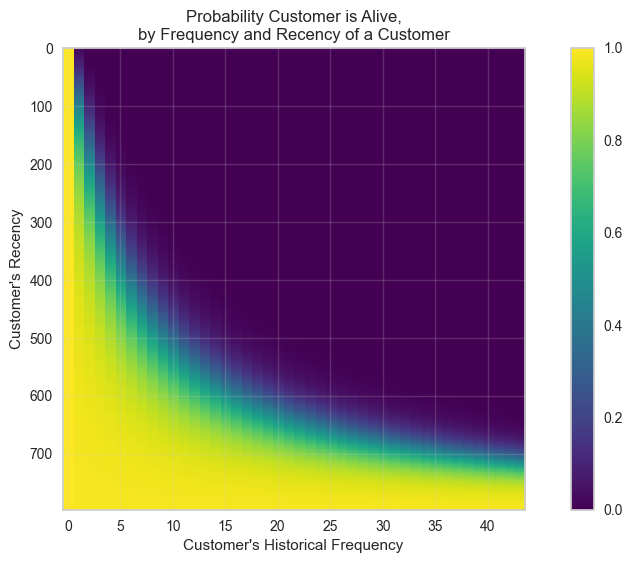

In [109]:
fig, ax = plt.subplots(figsize=(12,6))

g = plot_probability_alive_matrix(bg, **map_plot)
ax.grid(alpha=.2)

plt.show()

Another interesting matrix to look at is the probability of still being alive above, customer who buy infrequently but seen him recently more likely to alive as well as customer who buys frequently.

Customer who bought lot or frequently but haven't seen them recently more likely have small probability to be alive.

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

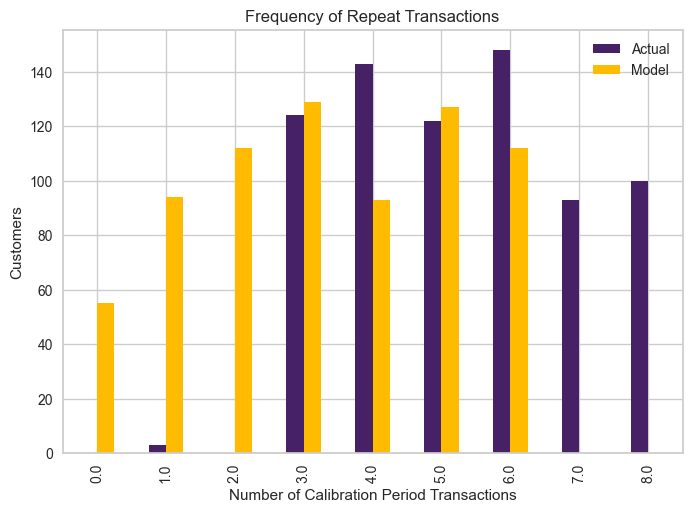

In [110]:
plot_period_transactions(bg)

In [111]:
dataset_btyd = pd.concat([dataset_btyd, dataset[['Dt_Customer']].reset_index(drop=True)], axis=1)

In [112]:
dataset_btyd['Dt_Customer'] = pd.to_datetime(dataset_btyd["Dt_Customer"], dayfirst=True, format='%Y-%m-%d')

In [113]:
from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(
    dataset_btyd, 
    'ID', 
    'Dt_Customer', 
    calibration_period_end='2013-01-01',
    observation_period_end='2014-10-04')

In [114]:
summary_cal_holdout.head()

frequency_cal  recency_cal  T_cal  frequency_holdout  duration_holdout
ID                                                                        
9             0.0          0.0  136.0                0.0             641.0
22            0.0          0.0   29.0                0.0             641.0
25            0.0          0.0   46.0                0.0             641.0
35            0.0          0.0  115.0                0.0             641.0
55            0.0          0.0   25.0                0.0             641.0

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

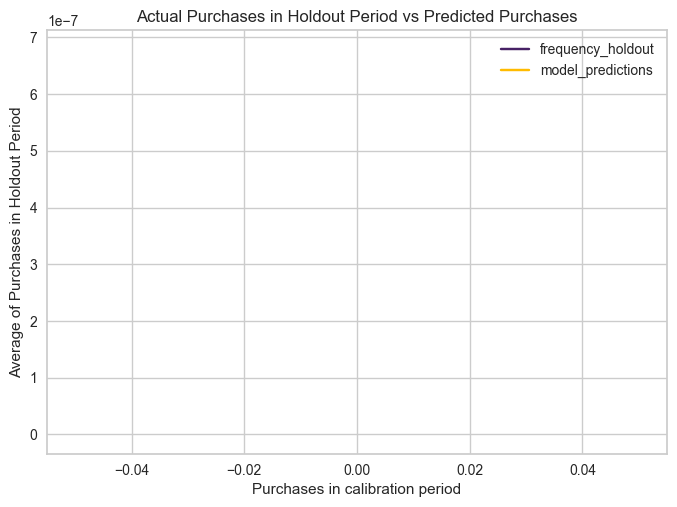

In [115]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf = BetaGeoFitter()
bgf.fit(
    summary_cal_holdout['frequency_cal'], 
    summary_cal_holdout['recency_cal'],
    summary_cal_holdout['T_cal']
)

plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

### <a id='toc8_1_4_'></a>[Estimate Number of Repeat Purchase](#toc0_)
----
Based on customer history, we can predict what an individuals future purchases might look like:

In [116]:
# calculate the number of expected repeat purchases over the next 30 days
t = 30
dataset_btyd['predicted_purchase'] = \
    bg.conditional_expected_number_of_purchases_up_to_time(
    t,
    dataset_btyd['U_Frequency'],
    dataset_btyd["U_Recency"],
    dataset_btyd["Tenure"]
    )

dataset_btyd.sort_values(by='U_Recency', ascending=False).head()

ID  U_Frequency  U_Recency  Tenure  Monetary_value  \
2160  7990            3        791     793        4.250000   
637   3277           14        783     792       24.333333   
47    4114           28        782     784       58.379310   
1928  7919           22        780     782       90.956522   
2107  2715           10        778     789       16.363636   

                 Segment Dt_Customer  predicted_purchase  
2160    Recent Customers  2012-08-02            0.163996  
637   Potential loyalist  2012-08-03            0.555164  
47             Champions  2012-08-11            1.062611  
1928           Champions  2012-08-13            0.850235  
2107    Recent Customers  2012-08-06            0.414622

In [226]:
dataset_btyd.groupby('Segment').agg({'predicted_purchase':'mean'}).sort_values(by='predicted_purchase', ascending=False).style.background_gradient('Blues')

### <a id='toc8_1_5_'></a>[Estimates the Probability of Customer Alive](#toc0_)
----
Given a customer transaction history, we can calculate their probability of being alive, according to our trained model.

In [117]:
dataset_btyd['p_alive'] = \
    bg.conditional_probability_alive(
        dataset_btyd["U_Frequency"],
        dataset_btyd["U_Recency"],
        dataset_btyd["Tenure"]
        )

In [225]:
dataset_btyd.groupby('Segment').agg({'p_alive':'mean'}).sort_values(by='p_alive', ascending=False).style.background_gradient('Blues')

<Axes: xlabel='p_alive', ylabel='Density'>

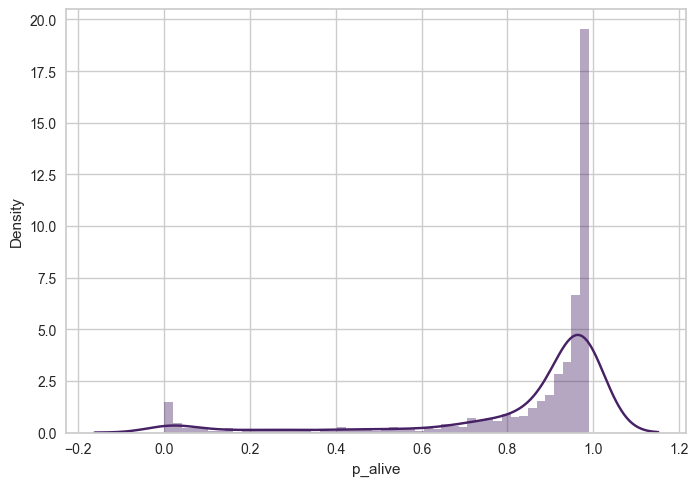

In [119]:
sns.distplot(dataset_btyd['p_alive'])

## <a id='toc8_2_'></a>[LTV Modelling](#toc0_)

### <a id='toc8_2_1_'></a>[Estimate the average transaction value](#toc0_)
--------
**`monetary_value`** can be used to represent profit, or revenue, or any value as long as it is consistently calculated for each customer.

The Gamma-Gamma submodel, in fact, assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

In [121]:
dataset_btyd[['U_Frequency', 'Monetary_value']].corr()

U_Frequency  Monetary_value
U_Frequency         1.00000         0.56224
Monetary_value      0.56224         1.00000

In [122]:
gg = GammaGammaFitter(penalizer_coef=0.00005)
gg.fit(frequency=dataset_btyd["U_Frequency"], 
       monetary_value=dataset_btyd["Monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 2205 subjects, p: 1.34, q: 1.50, v: 18.52>

In [123]:
dataset_btyd["predicted_sales"] = \
    gg.conditional_expected_average_profit(
        dataset_btyd["U_Frequency"],
        dataset_btyd["Monetary_value"]
        )

In [224]:
dataset_btyd.groupby('Segment').agg({'predicted_sales':'mean'}).sort_values(by='predicted_sales', ascending=False).style.background_gradient('Blues')

In [125]:
print(f"Expected Average sales: {dataset_btyd['predicted_sales'].mean():.4f}")
print(f"Actual Average sales: {dataset_btyd['Monetary_value'].mean():.4f}")

Expected Average sales: 33.6886
Actual Average sales: 32.5931


## <a id='toc8_3_'></a>[Estimating customer lifetime value](#toc0_)

In [222]:
dataset_btyd["LTV"] = gg.customer_lifetime_value(
    bg, 
    dataset_btyd["U_Frequency"],
    dataset_btyd["U_Recency"],
    dataset_btyd["Tenure"],
    dataset_btyd["Monetary_value"],
    time = 12,
    freq = "D",
    discount_rate = 0.01
)

dataset_btyd.head()

ID  U_Frequency  U_Recency  Tenure  Monetary_value             Segment  \
0  5524           24        702     760       64.680000     Loyal customers   
1  2174            5        172     210        4.500000           Promising   
2  4141           20        383     409       36.952381     Loyal customers   
3  6182            7        210     236        6.625000  Potential loyalist   
4  5324           18        164     258       22.210526             At risk   

  Dt_Customer  predicted_purchase   p_alive  predicted_sales         LTV  
0  2012-09-04            0.889420  0.927841        64.453107  608.579362  
1  2014-03-08            0.770961  0.966031         7.636261   62.669606  
2  2013-08-21            1.384272  0.960181        37.187039  530.371041  
3  2014-02-10            0.915068  0.973244         8.803198   85.102624  
4  2014-01-19            0.088830  0.045038        22.769099   20.175907

# <a id='toc9_'></a>[Conclusion](#toc0_)

In [223]:
dataset_btyd_ltv = \
    dataset_btyd.groupby('Segment').agg({'LTV':'mean'}).sort_values('LTV', ascending=False)

dataset_btyd_ltv.style.background_gradient('Blues')

In [173]:
final_dataset = dataset[['ID', 'Education','Marital_Status','Income','child','age','Response']].copy().merge(dataset_btyd, on='ID')

In [236]:
for col in ['predicted_purchase', 'p_alive', 'predicted_sales', 'LTV']:

    sort_dataset = final_dataset.groupby('Segment').agg({col:'mean'}).reset_index()

    fig = px.bar(sort_dataset, y=col, x='Segment', color=col, color_continuous_scale='Blues', text=col, text_auto='.2s',
                title=f"Segment by {col}")

    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.show()

- **Predicted Purchase**<br>
Champions have the highest predicted_purchase, followed by Loyal Customer and Potential Loyalist<br>
<br>
While About to sleep and lost have the lowest predicted_purchase since these segment more likely to have low recency and low frequency

- **Customer Retention**<br>
Probability of customer to being alive in future have Recent Customer, Champions, and Promising with the highest probability since these segments have high recency as well.

- **Predicted_sales**<br>
Future potential avg transaction or sales for each segments have At risk segments with the highest potential sales followed by Loyal Customers and Can't loose them,<br>
<br>
While Recent customer, Lost and Promising have the the lowest potential avg transactions in the future with low monetary values and low frequency.

- **Lifetime Values**<br>
Champions and Loyal Customers have dominated as the segments that typically have high LTV while Recent Customer, Promising and Lost more likely have low LTV.